# Preparing the data for the model

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [45]:
pics_path = 'sneakers pics copy/'
brands = ['nike pics copy', 'adidas pics copy']

In [46]:
# get into the path for both folders
# look at the image

# for brand in brands:
#    path = os.path.join(pics_path, brand)
#    for img in os.listdir(path):
#        img_array = cv2.imread(os.path.join(path,img))
#        plt.imshow(img_array)
#        plt.show()
#        break
#    break

In [85]:
# img_array.shape

In [48]:
IMG_SIZE = 200

In [49]:
# size of the array is too big, let's resize it while not losing much information

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

NameError: name 'img_array' is not defined

In [50]:
new_array.shape

NameError: name 'new_array' is not defined

In [51]:
nike_img_data = []
adidas_img_data = []

def train_data():
    for brand in brands:
        path = os.path.join(pics_path, brand)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            sneaker_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            if path == 'sneakers pics copy/nike pics copy':
                nike_img_data.append(sneaker_array)
            elif path == 'sneakers pics copy/adidas pics copy':
                adidas_img_data.append(sneaker_array)

In [52]:
train_data()

In [53]:
print(len(nike_img_data))

840


In [54]:
print(len(adidas_img_data))

1008


In [55]:
nike_df = pd.read_csv('nike_shoes_copy.csv')
adidas_df = pd.read_csv('adidas_shoes_copy.csv')

In [56]:
nike_df.head(3)

,Unnamed: 0,brand,name,price
0,0,Nike Sportswear,AIR FORCE 1 '07 - Trainers - white,£74.99
1,1,Nike Sportswear,AIR FORCE 1 '07 - Trainers - black,£74.99
2,2,Nike Sportswear,AIR MAX 2090 - Trainers - black/white/wolf gre...,£77.99


In [57]:
nike_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [58]:
nike_df['image'] = nike_img_data

In [59]:
nike_df['brand'] = 'nike'

In [60]:
nike_df.head(3)

,brand,name,price,image
0,nike,AIR FORCE 1 '07 - Trainers - white,£74.99,"[[[246, 246, 246], [246, 246, 246], [246, 246,..."
1,nike,AIR FORCE 1 '07 - Trainers - black,£74.99,"[[[246, 246, 246], [246, 246, 246], [246, 246,..."
2,nike,AIR MAX 2090 - Trainers - black/white/wolf gre...,£77.99,"[[[241, 241, 241], [241, 241, 241], [241, 241,..."


In [61]:
adidas_df.head(3)

,Unnamed: 0,brand,name,price
0,0,adidas Performance,SAMBA LEATHER FOOTBALL SHOES INDOOR - Trainers...,£46.74
1,1,adidas Originals,X9000L3 BOOST SPORTS RUNNING SHOES UNISEX - Tr...,£52.50
2,2,adidas Originals,OZWEEGO - Trainers - core black/carbon,From £62.99


In [62]:
adidas_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [63]:
adidas_df['image'] = adidas_img_data

In [64]:
adidas_df['brand'] = 'adidas'

In [65]:
adidas_df.head(3)

,brand,name,price,image
0,adidas,SAMBA LEATHER FOOTBALL SHOES INDOOR - Trainers...,£46.74,"[[[246, 246, 246], [246, 246, 246], [246, 246,..."
1,adidas,X9000L3 BOOST SPORTS RUNNING SHOES UNISEX - Tr...,£52.50,"[[[241, 241, 241], [241, 241, 241], [241, 241,..."
2,adidas,OZWEEGO - Trainers - core black/carbon,From £62.99,"[[[246, 246, 246], [246, 246, 246], [245, 245,..."


In [66]:
# looking at nike images
# plt.imshow(adidas_df['image'][65])
# plt.show()

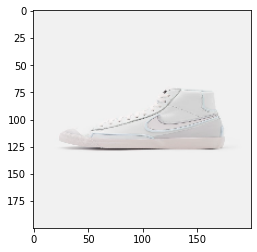

In [67]:
plt.imshow(nike_df['image'][237])
plt.show()

In [68]:
# looking at adidas images
# plt.imshow(adidas_df['image'][65])
# plt.show()

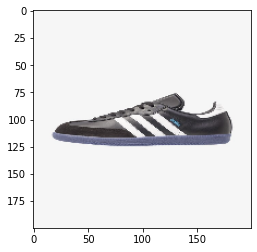

In [69]:
plt.imshow(adidas_df['image'][0])
plt.show()

In [70]:
comb_dfs = [nike_df, adidas_df]

In [92]:
sneakers_df = pd.concat(comb_dfs, ignore_index=True)

In [95]:
from tqdm import tqdm
tqdm.pandas()

c:\users\erik\appdata\local\programs\python\python38\lib\site-packages\tqdm\std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [96]:
sneakers_df["image"] = sneakers_df["image"].progress_apply(lambda x: x.tolist()).astype(str)
sneakers_df["image"]

100%|██████████| 1848/1848 [00:20<00:00, 91.22it/s] 


0       [[[246, 246, 246], [246, 246, 246], [246, 246,...
1       [[[246, 246, 246], [246, 246, 246], [246, 246,...
2       [[[241, 241, 241], [241, 241, 241], [241, 241,...
3       [[[246, 246, 246], [246, 246, 246], [246, 246,...
4       [[[241, 241, 241], [241, 241, 241], [241, 241,...
                              ...                        
1843    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1844    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1845    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1846    [[[246, 246, 246], [246, 246, 246], [246, 246,...
1847    [[[246, 246, 246], [246, 246, 246], [246, 246,...
Name: image, Length: 1848, dtype: object

In [97]:
sneakers_df.to_csv('sneakers copy.csv')

In [73]:
adidas_df['image'][1].shape

(200, 200, 3)

In [74]:
sneakers_df['image'][0].shape

(200, 200, 3)

In [75]:
X = []

for image in sneakers_df['image']:
    X.append(image)

In [76]:
len(X)

1848

In [77]:
y = []

for brand in sneakers_df['brand']:
    y.append(brand)

In [78]:
len(y)

1848

In [79]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [80]:
X.shape

(1848, 200, 200, 3)

In [83]:
len(y)

1848

In [84]:
import pickle

pickle_out = open('X_1.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y_1.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [40]:
# pickle_in = open('X.pickle', 'rb')
# X = pickle.load(pickle_in)

# pickle_in = open('y.pickle', 'rb')
# y = pickle.load(pickle_in)

In [41]:
# images_train_clean["images"] = images_train_clean["images"].apply(lambda x: x if x.shape == (200, 200, 3) else np.nan)
# images_train_final = images_train_clean.dropna().copy()